In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [8]:
from google.colab import files 
src = list(files.upload().values())[0] 
open('deeplearning_check.py','wb').write(src)



Saving deeplearning_check.py to deeplearning_check.py


7903

In [9]:
from google.colab import files 
src = list(files.upload().values())[0] 
open('basic_preprocessing.py','wb').write(src)

Saving basic_preprocessing.py to basic_preprocessing.py


5233

In [10]:
from google.colab import files 
src = list(files.upload().values())[0] 
open('machine_learning.py','wb').write(src)

Saving machine_learning.py to machine_learning.py


5310

In [11]:
!pip install split_folders

In [12]:
from basic_preprocessing import *
from deeplearning_check import *
from machine_learning import *

gpu_check()
set_global_determinism(seed=SEED)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5727720355397607650
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11345264640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2366639589865586330
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]
tf 2.6.0
keras 2.6.0
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라
set_global_determinism(seed=1337) 이거 꼭 해라


#### basic model

In [13]:
set_global_determinism(seed=1337)

In [14]:
train_dir = '/content/drive/MyDrive/Sign Detection/Binary_dataset/Fragile_non/train'
test_dir = '/content/drive/MyDrive/Sign Detection/Binary_dataset/Fragile_non/test'
val_dir = '/content/drive/MyDrive/Sign Detection/Binary_dataset/Fragile_non/val'

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
from keras import Input
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(200,200), color_mode='rgb')
val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(200, 200), color_mode='rgb')
test_generator = test_datagen.flow_from_directory(test_dir,batch_size=16, target_size=(200, 200), color_mode='rgb')

input_tensor = Input(shape=(200, 200, 3), dtype='float32', name='input')

Found 548 images belonging to 2 classes.
Found 68 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


#### model creating

In [24]:
def create_model():
    optimizer = Adam()
    
    pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
    #include_top FC 레이어 포함유무 결정
    #feature extraction 파라미터들은 이미지넷으로 학습된 값들을 그대로 사용할 것이기 때문에 trainable의 속성을 False
    pre_trained_vgg.trainable = False
    additional_model = tf.keras.Sequential()
    additional_model.add(pre_trained_vgg)
    additional_model.add(Flatten())
    additional_model.add(tf.keras.layers.Dense(4096, activation='relu'))
    additional_model.add(tf.keras.layers.Dense(2048, activation='relu'))
    additional_model.add(tf.keras.layers.Dense(1024, activation='relu'))
    additional_model.add(tf.keras.layers.Dense(2, activation='softmax'))
    

    additional_model.compile(optimizer = optimizer, loss = keras.losses.categorical_crossentropy, metrics=['acc'])

    
    return additional_model

In [25]:
tf.__version__

'2.6.0'

In [26]:
keras.__version__

'2.6.0'

In [27]:
# 모델 실행 옵션 
model = create_model()
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)              75501568  
_________________________________________________________________
dense_5 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 2050      
Total params: 100,707,138
Trainable params: 85,992,450
Non-trainable params: 14,714,688
________________________________

In [28]:
checkpoint_path = "check_point/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [ ]:
#모델의 가중치 저장
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
            monitor='loss', 
            mode='min',
            save_best_only=True,
            save_weights_only=True,
            verbose=1)

#새로운 콜백으로 모델 훈련하기
history = model.fit_generator(train_generator, 
            steps_per_epoch=math.ceil(train_generator.n / train_generator.batch_size), 
            epochs=50, 
            validation_data=val_generator, 
            validation_steps=math.ceil(val_generator.n / val_generator.batch_size), 
            callbacks=[checkpoint],
            shuffle=False)

Epoch 1/50
35/35 [==============================] - 132s 4s/step - loss: 1.9137 - acc: 0.7609 - val_loss: 0.3862 - val_acc: 0.8382

Epoch 00001: loss improved from inf to 1.91371, saving model to check_point/cp.ckpt
Epoch 2/50
35/35 [==============================] - 7s 197ms/step - loss: 0.1618 - acc: 0.9398 - val_loss: 0.2081 - val_acc: 0.8971

Epoch 00002: loss improved from 1.91371 to 0.16184, saving model to check_point/cp.ckpt
Epoch 3/50
35/35 [==============================] - 7s 196ms/step - loss: 0.0694 - acc: 0.9818 - val_loss: 0.2413 - val_acc: 0.9118

Epoch 00003: loss improved from 0.16184 to 0.06935, saving model to check_point/cp.ckpt
Epoch 4/50
35/35 [==============================] - 7s 196ms/step - loss: 0.0321 - acc: 0.9891 - val_loss: 0.3358 - val_acc: 0.9118

Epoch 00004: loss improved from 0.06935 to 0.03212, saving model to check_point/cp.ckpt
Epoch 5/50
35/35 [==============================] - 7s 195ms/step - loss: 0.1393 - acc: 0.9489 - val_loss: 0.1698 - val_a

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) +1)
    
    

fig = plt.figure()
fig.set_size_inches(15, 5)

fig.add_subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label ='Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

# plt.figure()
fig.add_subplot(1, 2, 2) 
plt.plot(epochs, loss, 'b', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and validation lose')
plt.legend()

plt.show()

In [ ]:
#맥에서는 !ls
#저장된 checkpoint확인하기
!dir {checkpoint_dir}

checkpoint  cp.ckpt.data-00000-of-00001  cp.ckpt.index


In [ ]:
#가장 마지막에 만들어진 체크포인트 확인
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'check_point/cp.ckpt'

In [ ]:
# 기본 모델 객체를 만듭니다
model = create_model()

# 모델을 평가합니다
loss, acc = model.evaluate(val_generator, verbose=2)
print("훈련되지 않은 모델의 정확도: {:5.2f}%".format(100*acc))

5/5 - 1s - loss: 0.6871 - acc: 0.5441
훈련되지 않은 모델의 정확도: 54.41%


In [ ]:
# 가중치 로드
model.load_weights(latest)

# # 모델 재평가
loss,acc = model.evaluate(val_generator)
print("복원된 모델의 정확도: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 39ms/step - loss: 0.4530 - acc: 0.9559
복원된 모델의 정확도: 95.59%


#### final model save

In [ ]:
model.save('[0915]colab_fragile.h5')

model_json = model.to_json()
with open("[0915]colab_fragile.json", "w") as json_file : 
    json_file.write(model_json)

model.save_weights("[0915]colab_fragile_weight.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
/pwd

'/content'

In [ ]:
label_dict = get_label_dict(train_generator)
label_dict

{0: 'fragile', 1: 'non_fragile'}

In [ ]:
def predict (model, real_path):
    img_list = get_img(real_path)
    try:
        for num, i in enumerate (img_list):
            resized_frame = cv2.resize(i, (200,200))
            frame_for_pred = prepare_image_for_prediction( resized_frame )
            pred_vec = model.predict(frame_for_pred)
            pred_class =[]
            confidence = np.round(pred_vec.max(),2)
            pc = pred_vec.argmax()
            pred_class.append( (pc, confidence) )
            txt = get_display_string(pred_class, label_dict)
            i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
            # show(i)
            print(txt)
    except TypeError:
        print('error')
        pass
    else:
        pass

In [ ]:
real_path = '/content/drive/MyDrive/Sign Detection/ML/test/'

In [ ]:
get_file_list(real_path)

### Evaluate

In [ ]:
results = model.evaluate(val_generator, batch_size=16)
print('test loss, test acc: ', results)

5/5 [==============================] - 0s 37ms/step - loss: 0.4530 - acc: 0.9559
test loss, test acc:  [0.4529716968536377, 0.9558823704719543]


### Real Test

In [ ]:
model.load_weights('[0915]colab_4class.h5')

In [ ]:
def prepare_image_for_prediction( img):
   
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    # The below function inserts an additional dimension at the axis position provided
    img = np.expand_dims(img, axis=0)
    # perform pre-processing that was done when resnet model was trained.
    return preprocess_input(img)

In [ ]:
file_list = get_file_list('/content/drive/MyDrive/Sign Detection/ML/test/')
print(len(file_list))

73


In [ ]:
img_list=[]
for i in file_list[1:]:
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    input_img = prepare_image_for_prediction(img)
    img_list.append(input_img)


img_list[0]

array([[[[112.061  ,  99.221  ,  92.32   ],
         [112.061  ,  99.221  ,  92.32   ],
         [112.061  ,  99.221  ,  92.32   ],
         ...,
         [ 84.061  ,  65.221  ,  44.32   ],
         [116.061  ,  96.221  ,  83.32   ],
         [125.061  , 107.221  ,  97.32   ]],

        [[112.061  ,  99.221  ,  92.32   ],
         [112.061  ,  99.221  ,  92.32   ],
         [112.061  ,  99.221  ,  92.32   ],
         ...,
         [ 94.061  ,  75.221  ,  52.32   ],
         [114.061  ,  97.221  ,  81.32   ],
         [126.061  , 108.221  ,  97.32   ]],

        [[112.061  ,  99.221  ,  92.32   ],
         [112.061  ,  99.221  ,  92.32   ],
         [112.061  ,  99.221  ,  92.32   ],
         ...,
         [117.061  ,  99.221  ,  70.32   ],
         [121.061  , 105.221  ,  83.32   ],
         [127.061  , 110.221  ,  92.32   ]],

        ...,

        [[123.061  , 110.221  , 103.32   ],
         [123.061  , 110.221  , 103.32   ],
         [123.061  , 110.221  , 103.32   ],
         ...,


In [ ]:
predicted_class = []

for i in img_list:
    pred_vec = model.predict(i)
    confidence = np.round(pred_vec.max(),2)
    pc = pred_vec.argmax()
    predicted_class.append(pc)

In [ ]:
answer_test = []

for i in file_list:
    if 'fragile' in i:
        answer_test.append('0')
    elif 'up_resized' in i:
        answer_test.append('2')
    elif 'handle_resized' in i :
        answer_test.append('1')
    elif 'wet_resized' in i :
        answer_test.append('3')
    else :
        answer_test.append(i)

In [ ]:
print(len(file_list))
print(len(answer_test))

73
72


In [ ]:
answer_test = answer_test[1:]

In [ ]:
answer_test=[]
for i in answer_test:
    i =i.astype('int')
    answer_test.append(i)

In [ ]:
predicted_class = []
for i in predicted_class:
    i =i.astype('int')
    predicted_class.append(i)

In [ ]:
metric = tf.keras.metrics.BinaryAccuracy()
acc = metric(answer_test, predicted_class)
print(acc)

tf.Tensor(nan, shape=(), dtype=float32)


### confusion matrix

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

# 1.Predict classes
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)

# Get most likely class axis=1(열로 가장 큰 수의 위치를 보겠다는 소리), 
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)
# 2.Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())   
# 3. Use scikit-learn to get statistics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)


print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, predicted_classes))
print(report)    

[0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1
 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0]
Confusion Matrix
[[18 13]
 [11 30]]
              precision    recall  f1-score   support

     fragile       0.62      0.58      0.60        31
 non_fragile       0.70      0.73      0.71        41

    accuracy                           0.67        72
   macro avg       0.66      0.66      0.66        72
weighted avg       0.66      0.67      0.67        72



In [ ]:
def confusion_plot(confusion_array, x):
    plt.figure(figsize = (x,x))
    ax= plt.subplot() 
    sns.heatmap(confusion_array, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion matrix')

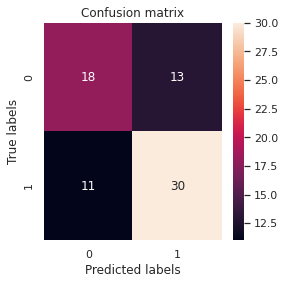

In [ ]:
con = confusion_matrix(test_generator.classes, predicted_classes)
confusion_plot(con, 4)

### ROC_CURVE

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
data_path = '/content/drive/MyDrive/Sign Detection/Binary_dataset/Fragile_non/test'

In [ ]:
get_file_list(data_path)

['/content/drive/MyDrive/Sign Detection/Binary_dataset/Fragile_non/testfragile',
 '/content/drive/MyDrive/Sign Detection/Binary_dataset/Fragile_non/testnon_fragile']

In [ ]:
categories = ['fragile', 'non_fragile']

In [ ]:
def data_for_ml (categories, data_path, num):
    data = []

    

    for category in categories:
        file_path = os.path.join(data_path, category)
        print(file_path)
        label = categories.index(category)

        for img in os.listdir(file_path):
            imgpath = os.path.join(file_path, img)

            try: 
                pet_img = cv2.imread(imgpath, 0)
                pet_img = cv2.resize(pet_img, (num, num,3))

                images = np.array(pet_img).flatten()

                data.append([images, label])

            except Exception as e:
                pass

In [ ]:
def feature_label_maker(data):
    features=[]
    labels=[]
    for feature, label in data:
        features.append(feature)
        labels.append(label)
        
    features = np.array(features)
    labels = np.array(labels)

    print('features: ', len(features))
    print('features ex: ', features[0])
    print('feature shape: ', feature.shape)
    print('-----------------------------')
    print('labels: ', len(labels))
    print('labels ex: ', labels[0])
    print('labels shape: ', feature.shape)

    return features, labels


In [ ]:
data = data_for_ml(categories, data_path, 200)

/content/drive/MyDrive/Sign Detection/Binary_dataset/Fragile_non/test/fragile
/content/drive/MyDrive/Sign Detection/Binary_dataset/Fragile_non/test/non_fragile


TypeError: ignored

In [ ]:
data

In [ ]:
x_test = []
for i in features:
    i.reshape(200,200,3)

ValueError: ignored

In [ ]:
for i in categories:
    img_path = data_path+i
    print(i, count_img(img_path))

이미지 수 30
fragile None
이미지 수 38
non_fragile None


In [ ]:
Counter(labels)

Counter({0: 30, 1: 38})

In [ ]:
y = (labels==0).astype('int')
Counter(y)

Counter({0: 38, 1: 30})

In [ ]:
y_pred_keras = model.predict(features).ravel()
y_pred_keras
# fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_generator, y_pred_keras)

ValueError: ignored